In [12]:
import os
os.chdir("D:/Projects/uoft_scs_project/Hexapawn")
import sys

from Config.config import Config
from Environment.environment import Hexapawn
from Agent.agent import Agent
from Agent.multi_agent import MultiAgent
from Utils import utils

import json
import pandas as pd
import random
import numpy as np

from tqdm import tqdm

import logging
logging.basicConfig(level=logging.CRITICAL)

import warnings
warnings.filterwarnings("ignore")

In [13]:
q_table = pd.read_csv(Config.q_table_path, index_col=[0])
state_mem = json.load(open(Config.agent_state_memory_path, 'r'))
state_mem = {v:k for k,v in state_mem.items()}

In [41]:
move_under_analysis = "(1, 2)_diagonal1"
analysis_index = q_table.sort_values(by=move_under_analysis, ascending=False).index[0]

inx = analysis_index
try:
    optimal_action = q_table.loc[inx].idxmax().split("_")
    worst_action = q_table.loc[inx].idxmin().split("_")
    optimal_start, optimal_action = eval(optimal_action[0]), optimal_action[1]
    worst_start, worst_action = eval(worst_action[0]), worst_action[1]
except KeyError:
    pass

display(eval(state_mem[inx]))
print("Agent Optimal action:", optimal_start, optimal_action)
print("Agent Worst action:", worst_start, worst_action)

[[' ', ' ', 'W', ' '],
 ['W', ' ', 'W', ' '],
 ['B', 'W', ' ', 'B'],
 [' ', 'B', ' ', ' ']]

Agent Optimal action: (1, 2) diagonal1
Agent Worst action: (0, 2) diagonal2


In [26]:
agents = MultiAgent(agentW_type="logical", 
                    agentB_type="naive")

In [27]:
W=0
B=0
N = 10
for _ in range(N):
    agents.run_episode()
    if agents.agentW.total_reward > agents.agentB.total_reward:
        W+=1
    else:
        B+=1

print(f"Agent W winning percent: {W/N}")
print(f"Agent B winning percent: {B/N}")

Agent W winning percent: 0.7
Agent B winning percent: 0.3


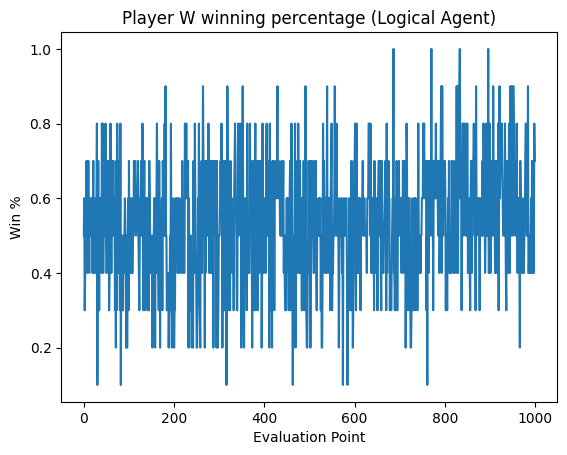

In [36]:
win_percent = utils.plot_logical_agent_win_percent(window_size=10, last_n_episodes = 10000)

Text(0, 0.5, 'Win %')

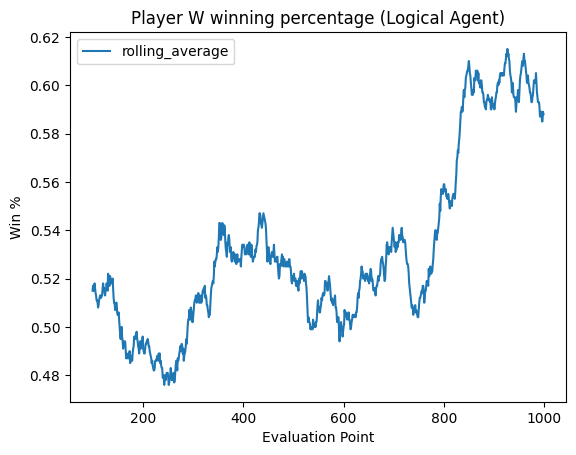

In [37]:
from Config.config import Config
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

sns.lineplot(pd.DataFrame(np.array(win_percent)).rolling(100).mean().values.flatten(), label='rolling_average')

plt.title("Player W winning percentage (Logical Agent)")
plt.xlabel("Evaluation Point")
plt.ylabel("Win %")